In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import nibabel as nib
import torch
from skimage.transform import resize
from skimage.color import gray2rgb
import os

2023-04-16 20:14:47.337033: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-16 20:14:48.484079: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
train_on_gpu = torch.cuda.is_available()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
# Load the pre-trained ResNet50 model
base_model = ResNet50(include_top=False, weights='imagenet',classes=2,input_shape=(224, 224, 3))

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output1 = layers.Dense(1, activation='sigmoid', name='output1')(x)
output2 = layers.Dense(1, activation='sigmoid', name='output2')(x)
model = models.Model(inputs=base_model.input, outputs=[output1, output2])

2023-04-16 20:14:52.205768: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
from keras.optimizers import Adam
if train_on_gpu:
    with tf.device('/GPU:0'):  # specify GPU to use
        model = model
else:
    model = model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
labels_df =pd.read_csv('/home/sandyap/DM project/cleaned_labels.csv')
with tf.device('/GPU:0'):  # specify GPU to use
        labels_df=labels_df

In [6]:
labels_df.replace({'Yes': 1, 'No': 0}, inplace=True)

In [7]:
train_labels_df, test_labels_df = train_test_split(labels_df, test_size=0.4, random_state=42)
with tf.device('/GPU:0'):  # specify GPU to use
        train_labels_df=train_labels_df
with tf.device('/GPU:0'):  # specify GPU to use
        test_labels_df=test_labels_df

In [8]:
# Loop through each image file in the folder
train_images = []
train_labels = []
k=0
for i in range(len(train_labels_df)):
    filename = train_labels_df.iloc[i]['Filename']
    k=k+1
    print(k)
    print(filename)
    facial_label = train_labels_df.iloc[i]['Recognizable-Facial-Feature']
    #print('----------------------actual------------------------')
    #print(facial_label)
    brain_label = train_labels_df.iloc[i]['Brain-Feature-Loss']
    #print(brain_label)
    
    # Load the image data
    img = nib.load('/home/sandyap/DM project/files/'+filename+'.gz')
    img_data = img.get_fdata()
    with tf.device('/GPU:0'):  # specify GPU to use
        img_data=img_data
    print('image shape')
    print(img_data.shape)
    img_data = gray2rgb(img_data)
    print(img_data.shape)
    
    # Preprocess the image data
    #img_data = np.expand_dims(img_data, axis=0)
    img_data = resize(img_data[0], (224, 224,3), anti_aliasing=True, anti_aliasing_sigma=0.2)
    print('after resizing')
    print(img_data.shape)
    img_data = preprocess_input(img_data)
    print('after using preprocess_input')
    print(img_data.shape)
    train_images.append(img_data)
    train_labels.append([facial_label, brain_label])
train_images = np.array(train_images)
train_labels = np.array(train_labels)

1
IXI296-HH-1970-T1_bet_7.nii
image shape
(256, 256, 150)
(256, 256, 150, 3)
after resizing
(224, 224, 3)
after using preprocess_input
(224, 224, 3)
2
IXI178-Guys-0778-T1_bse_less_s58_r1.nii
image shape
(256, 256, 150)


/local_scratch/pbs.495813.pbs02/ipykernel_3124262/1801713962.py:28: UserWarning: Anti-aliasing standard deviation greater than zero but not down-sampling along all axes
  img_data = resize(img_data[0], (224, 224,3), anti_aliasing=True, anti_aliasing_sigma=0.2)


(256, 256, 150, 3)
after resizing
(224, 224, 3)
after using preprocess_input
(224, 224, 3)
3
IXI461-Guys-0998-T1_bet_79.nii
image shape
(256, 256, 150)
(256, 256, 150, 3)
after resizing
(224, 224, 3)
after using preprocess_input
(224, 224, 3)
4
IXI629-Guys-1095-T1_bet_71.nii
image shape
(256, 256, 150)
(256, 256, 150, 3)
after resizing
(224, 224, 3)
after using preprocess_input
(224, 224, 3)
5
IXI276-HH-1840-T1_bse_default.nii
image shape
(256, 256, 150)
(256, 256, 150, 3)
after resizing
(224, 224, 3)
after using preprocess_input
(224, 224, 3)
6
IXI594-Guys-1089-T1_bse_less_s52_r1.nii
image shape
(256, 256, 150)
(256, 256, 150, 3)
after resizing
(224, 224, 3)
after using preprocess_input
(224, 224, 3)
7
IXI142-Guys-0786-T1_bet_07.nii
image shape
(256, 256, 150)
(256, 256, 150, 3)
after resizing
(224, 224, 3)
after using preprocess_input
(224, 224, 3)
8
IXI360-Guys-0912-T1_bse_less_s47_r1.nii
image shape
(256, 256, 150)
(256, 256, 150, 3)
after resizing
(224, 224, 3)
after using preproc

In [9]:
print(train_images.shape)

(1236, 224, 224, 3)


In [10]:
history=model.fit(train_images, [train_labels[:,0], train_labels[:,1]], epochs=10, batch_size=32)

Epoch 1/10
39/39 [==============================] - 70s 2s/step - loss: 1.3872 - output1_loss: 0.7013 - output2_loss: 0.6859 - output1_accuracy: 0.5850 - output2_accuracy: 0.5963
Epoch 2/10
39/39 [==============================] - 64s 2s/step - loss: 1.3216 - output1_loss: 0.6609 - output2_loss: 0.6607 - output1_accuracy: 0.6464 - output2_accuracy: 0.6351
Epoch 3/10
39/39 [==============================] - 64s 2s/step - loss: 1.3187 - output1_loss: 0.6608 - output2_loss: 0.6578 - output1_accuracy: 0.6464 - output2_accuracy: 0.6408
Epoch 4/10
39/39 [==============================] - 64s 2s/step - loss: 1.3003 - output1_loss: 0.6490 - output2_loss: 0.6513 - output1_accuracy: 0.6545 - output2_accuracy: 0.6481
Epoch 5/10
39/39 [==============================] - 64s 2s/step - loss: 1.3107 - output1_loss: 0.6534 - output2_loss: 0.6572 - output1_accuracy: 0.6505 - output2_accuracy: 0.6375
Epoch 6/10
39/39 [==============================] - 64s 2s/step - loss: 1.3110 - output1_loss: 0.6522 - o

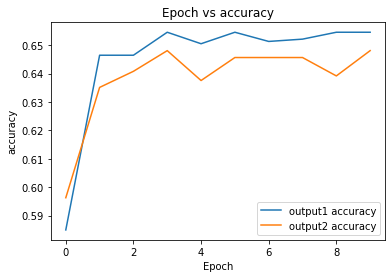

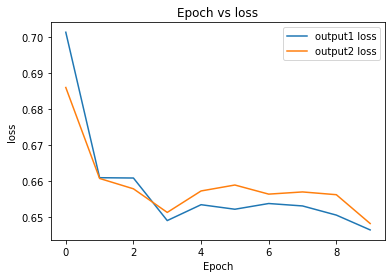

In [13]:
import matplotlib.pyplot as plt

# Get the training and validation loss values from the history object
op1_loss = history.history['output1_loss']
op2_loss = history.history['output2_loss']
op1_acc=history.history['output1_accuracy']
op2_acc=history.history['output2_accuracy']

# Create a plot of the training and validation loss over each epoch
#plt.plot(train_loss, label='Training Loss')
plt.plot(op1_acc, label='output1 accuracy')
plt.plot(op2_acc, label='output2 accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.title('Epoch vs accuracy')
plt.legend()
plt.show()
plt.plot(op1_loss, label='output1 loss')
plt.plot(op2_loss, label='output2 loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Epoch vs loss')
plt.legend()
plt.show()


In [12]:
# Loop through each image file in the folder
test_images = []
test_labels = []
k=1
for i in range(len(test_labels_df)):
    filename = test_labels_df.iloc[i]['Filename']
    k=k+1
    print(i)
    print(filename)
    facial_label = test_labels_df.iloc[i]['Recognizable-Facial-Feature']
    print('----------------------actual------------------------')
    print(facial_label)
    brain_label = test_labels_df.iloc[i]['Brain-Feature-Loss']
    print(brain_label)
    
    # Load the image data
    img = nib.load('/home/sandyap/DM project/files/'+filename+'.gz')
    img_data = img.get_fdata()
    with tf.device('/GPU:0'):  # specify GPU to use
        img_data=img_data
    print(img_data.shape)
    img_data = gray2rgb(img_data)
    print(img_data.shape)
    
    # Preprocess the image data
    #img_data = np.expand_dims(img_data, axis=0)
    img_data = resize(img_data[0], (224, 224,3), anti_aliasing=True, anti_aliasing_sigma=0.2)
    print('debug1')
    print(img_data.shape)
    img_data = preprocess_input(img_data)
    print('debug2')
    print(img_data.shape)
    
    '''preds = model.predict(img_data)
    print('debug3')
    pred_facial_prob = preds[0][0]
    pred_brain_prob = preds[0][1]
    print('-------------------predicted-----------------')
    print(pred_facial_prob)
    print(pred_brain_prob)
    # Check if the predicted label matches the actual label
    pred_facial_label = 0 if pred_facial_prob >= 0.5 else 1
    pred_brain_label = 0 if pred_brain_prob >= 0.5 else 1
    
    # Check if the predicted label matches the actual label
    if pred_facial_label == facial_label: #and pred_brain_label == brain_label:
        print('Facial features are properly removed in', filename)
    else:
        print('Facial features are not properly removed in', filename)
    if  pred_brain_label == brain_label:
        print('brain voxels are properly removed in', filename)
    else:
        print('brain voxels are not properly removed in', filename)'''
    test_images.append(img_data)
    test_labels.append([facial_label, brain_label])
test_images = np.array(test_images)
test_labels = np.array(test_labels)

0
IXI294-IOP-0868-T1_bse_default.nii
----------------------actual------------------------
1
0
(256, 256, 146)
(256, 256, 146, 3)
debug1
(224, 224, 3)
debug2
(224, 224, 3)
1
IXI045-Guys-0713-T1_bet_72.nii
----------------------actual------------------------
0
1
(256, 256, 150)


/local_scratch/pbs.495813.pbs02/ipykernel_3124262/1723540979.py:27: UserWarning: Anti-aliasing standard deviation greater than zero but not down-sampling along all axes
  img_data = resize(img_data[0], (224, 224,3), anti_aliasing=True, anti_aliasing_sigma=0.2)


(256, 256, 150, 3)
debug1
(224, 224, 3)
debug2
(224, 224, 3)
2
IXI450-Guys-1093-T1_bse_default.nii
----------------------actual------------------------
0
1
(256, 256, 150)
(256, 256, 150, 3)
debug1
(224, 224, 3)
debug2
(224, 224, 3)
3
IXI626-Guys-1094-T1_bse_high_s76_r2.nii
----------------------actual------------------------
0
1
(256, 256, 150)
(256, 256, 150, 3)
debug1
(224, 224, 3)
debug2
(224, 224, 3)
4
IXI307-IOP-0872-T1_bet_05.nii
----------------------actual------------------------
1
0
(256, 256, 146)
(256, 256, 146, 3)
debug1
(224, 224, 3)
debug2
(224, 224, 3)
5
IXI153-Guys-0782-T1_bse_high_s86_r2.nii
----------------------actual------------------------
0
1
(256, 256, 150)
(256, 256, 150, 3)
debug1
(224, 224, 3)
debug2
(224, 224, 3)
6
IXI616-Guys-1092-T1_bse_less_s5_r1.nii
----------------------actual------------------------
1
0
(256, 256, 150)
(256, 256, 150, 3)
debug1
(224, 224, 3)
debug2
(224, 224, 3)
7
IXI538-HH-2411-T1_bet_9.nii
----------------------actual----------------

In [14]:
loss, test_loss1,test_loss2, test_acc1, test_acc2 = model.evaluate(test_images, [test_labels[:,0], test_labels[:,1]])
print('Test Accuracy 1:', test_acc1)
print('Test Accuracy 2:', test_acc2)


26/26 [==============================] - 7s 243ms/step - loss: 1.3419 - output1_loss: 0.6614 - output2_loss: 0.6805 - output1_accuracy: 0.6650 - output2_accuracy: 0.6578
Test Accuracy 1: 0.6650485396385193
Test Accuracy 2: 0.6577669978141785
